In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Below sets the plots to inline in the jupyter notebook
%matplotlib inline

## Use the below for other matplotlib options
#%matplotlib qt
#%matplotlib notebook

In [124]:
df = pd.read_csv('data/stats.csv')
df

,name,blk_per_g,drb_per_g,pts_per_g,fg2_pct,ast_per_g,gs,pf_per_g,fg3_per_g,fta_per_g,...,ft_pct,stl_per_g,fg3_pct,fg2_per_g,g,fg2a_per_g,trb_per_g,orb_per_g,fg_per_g,fga_per_g
0,Kyrie Irving,0.3,2.7,20.8,0.481,5.5,316,2.2,1.8,4.5,...,0.866,1.3,0.378,5.8,316,12.1,3.4,0.7,7.6,16.8
1,J.R. Smith,0.2,2.7,13.1,0.466,2.2,302,2.3,2.0,2.3,...,0.734,1.0,0.375,2.7,846,5.8,3.2,0.5,4.7,11.2
2,LeBron James,0.8,6.0,27.2,0.538,6.9,993,1.9,1.4,8.3,...,0.744,1.7,0.339,8.4,994,15.7,7.2,1.2,9.8,19.7
3,Archie Goodwin,0.2,1.5,6.2,0.474,1.2,15,1.2,0.3,2.2,...,0.689,0.4,0.227,1.9,150,4.1,2.0,0.5,2.2,5.3
4,Quincy Acy,0.4,2.4,4.5,0.529,0.6,51,1.9,0.2,1.2,...,0.752,0.4,0.323,1.5,224,2.9,3.5,1.1,1.7,3.5
5,John Lucas III,0.0,0.8,4.8,0.409,1.5,8,0.8,0.7,0.4,...,0.768,0.4,0.344,1.2,239,3.0,1.0,0.2,1.9,5.0
6,Ty Lawson,0.1,2.1,12.9,0.490,6.2,328,1.6,0.9,3.6,...,0.765,1.2,0.364,3.7,491,7.6,2.8,0.6,4.6,10.1
7,Troy Williams,0.2,0.2,3.4,0.571,0.4,1,1.4,0.2,1.8,...,0.667,0.8,0.250,0.8,5,1.4,0.4,0.2,1.0,2.2
8,Metta World Peace,0.5,3.4,13.4,0.447,2.7,838,2.7,1.2,3.7,...,0.715,1.8,0.340,3.6,970,8.1,4.6,1.2,4.8,11.5
9,Nicolas Laprovittola,0.0,0.9,3.6,0.500,1.7,0,1.1,0.6,0.7,...,1.000,0.1,0.308,0.6,7,1.1,1.0,0.1,1.1,3.0


In [125]:
#Examples working with data frame
df['name'];

In [126]:
vals = df.values
trimvals = vals[:,1:]
data_mat = trimvals.astype(float)

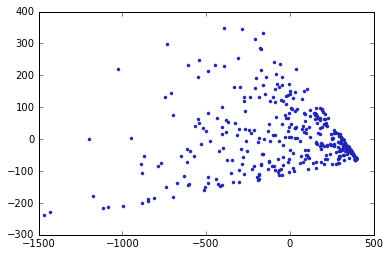

In [127]:
plot_PCA(data_mat)

In [128]:
def plot_PCA(data):
    from matplotlib import pyplot as MPL
    data_resc, data_orig, thirdthing = PCA(data)
    clr1 =  '#2026B2'
    fig = MPL.figure()
    ax1 = fig.add_subplot(111)
    ax1.plot(data_resc[:, 0], data_resc[:, 1], '.', mfc=clr1, mec=clr1)
    MPL.show()
    
def PCA(data, dims_rescaled_data=2):
    """
    returns: data transformed in 2 dims/columns + regenerated original data
    pass in: data as 2D NumPy array
    """
    from scipy import linalg as LA
    m, n = data.shape
    # mean center the data
    data -= data.mean(axis=0)
    # calculate the covariance matrix
    R =np.cov(data, rowvar=False)
    # calculate eigenvectors & eigenvalues of the covariance matrix
    # use 'eigh' rather than 'eig' since R is symmetric, 
    # the performance gain is substantial
    evals, evecs = LA.eigh(R)
    # sort eigenvalue in decreasing order
    idx = np.argsort(evals)[::-1]
    evecs = evecs[:,idx]
    # sort eigenvectors according to same index
    evals = evals[idx]
    # select the first n eigenvectors (n is desired dimension
    # of rescaled data array, or dims_rescaled_data)
    evecs = evecs[:, :dims_rescaled_data]
    # carry out the transformation on the data using eigenvectors
    # and return the re-scaled data, eigenvalues, and eigenvectors
    return np.dot(evecs.T, data.T).T, evals, evecs

def test_PCA(data, dims_rescaled_data=2):
    '''
    test by attempting to recover original data array from
    the eigenvectors of its covariance matrix & comparing that
    'recovered' array with the original data
    '''
    _ , _ , eigenvectors = PCA(data, dim_rescaled_data=2)
    data_recovered = np.dot(eigenvectors, m).T
    data_recovered += data_recovered.mean(axis=0)
    assert np.allclose(data, data_recovered)
    
    
### These functions assisted by this link:
# http://stackoverflow.com/questions/13224362/principal-component-analysis-pca-in-python